In [1]:
# Load the specific sheet into a pandas DataFrame
import pandas as pd
file_path = 'Kategorije_delovna verzija_BS_20092021.xlsx'
df = pd.read_excel(file_path, sheet_name='Baza znanja_07032022_Final+HTML')

# Display the first few rows of the DataFrame to understand its structure
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NIVO I,NIVO II,NIVO III,NIVO IIIa,NaN,ZA BAZO,NaN,NaN,NaN,NaN,DRUGI NIVO (DA/NE),NaN,EMAIL
1,ASISTENCA/INFO,VRSTA STORITVE - Področje asistence oz. inform...,VSEBINA VPRAŠANJA,NaN,STRANKINA VPRAŠANJA Kaj stranke vprašajo pri d...,EXTERNAL ODGOVOR (STRANKI),HTML EXTERNAL,INTERNAL NAVODILA ZAPOSLENI,HTML INTERNAL,KLJUČNE BESEDE,DRUGI NIVO (DA/NE),KDO,NASLOVI
2,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo imena/priimka?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"ime, priimek, osebni podatek, kontakt, zahteve...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
3,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo kontaktnega podatka?,Za spremembo kontaktnih podatkov je potrebno o...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"osebni podatek, kontakt, zahtevek, sprememba",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
4,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo telefonske številke?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"telefonska številka, telefon, osebni podatek, ...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN


In [2]:
# Skip the first row and select the column with the keywords
keywords_column = df['Unnamed: 9'][2:]

# Split the keywords by comma and count their occurrences
keywords_counter = {}

for entry in keywords_column:
    if pd.isna(entry):  # Skip NaN entries
        continue
    keywords = entry.split(',')
    for keyword in keywords:
        keyword = keyword.strip()  # Remove leading and trailing white spaces
        if keyword in keywords_counter:
            keywords_counter[keyword] += 1
        else:
            keywords_counter[keyword] = 1

# Count the number of unique keywords
num_unique_keywords = len(keywords_counter)

num_unique_keywords, keywords_counter

(1022,
 {'ime': 1,
  'priimek': 1,
  'osebni podatek': 3,
  'kontakt': 6,
  'zahtevek': 9,
  'sprememba': 11,
  'telefonska številka': 1,
  'telefon': 3,
  'e-mail': 4,
  'e-pošta': 1,
  'e-naslov': 1,
  'vloga': 4,
  'itriglav': 26,
  'naslov': 2,
  'pošta': 2,
  'osebni podatki': 5,
  'položnica': 1,
  'sprememba podatkov': 2,
  'plačilo': 16,
  'UPN obrazec': 2,
  'trajnik': 2,
  'direktna obremenitev': 1,
  'račun položnica': 1,
  'e-račun': 2,
  'zavarovanja': 3,
  'stečaj': 5,
  'sodišče': 5,
  'dolg': 7,
  'premoženje': 7,
  'stanje na polici': 3,
  'likvidacija': 2,
  'poravnava': 2,
  'preklic': 2,
  'sprememba datuma naroka': 1,
  'plačilo sodne takse': 1,
  'geslo': 6,
  'pregled pogodb': 1,
  'korupcija': 1,
  'Uradni list': 1,
  'podatki za KPK': 1,
  'izvršba': 3,
  'sklep status': 1,
  'rubež': 1,
  'opomin': 7,
  'kredit': 7,
  'premija': 15,
  'status': 2,
  'terjatev': 3,
  'zamudne obresti': 1,
  'blokiran račun': 1,
  'preplačilo': 2,
  'povračilo denarja': 1,
  'zn

In [5]:
import json
# Convert the keywords dictionary to a JSON string
keywords_json = json.dumps(keywords_counter)

# Write the JSON string to a file, ensuring that special characters are encoded correctly
with open('./keywords_fixed.json', 'w', encoding='utf-8') as json_file:
    json.dump(keywords_counter, json_file, ensure_ascii=False)


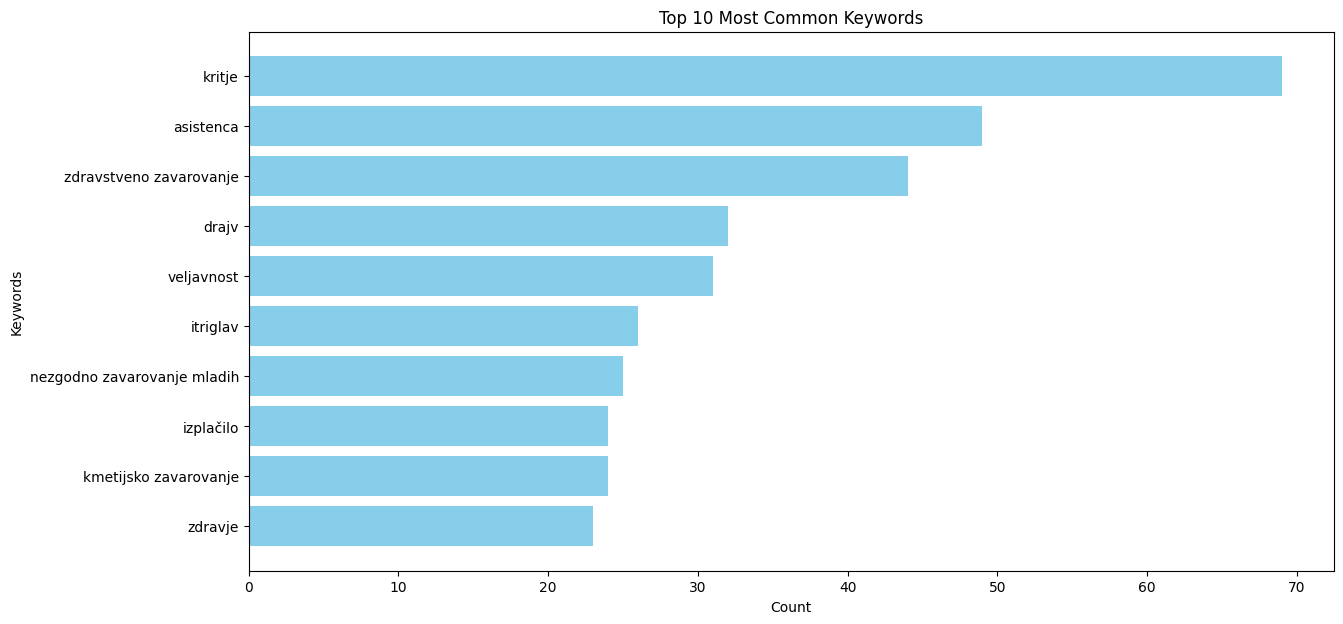

In [6]:
import matplotlib.pyplot as plt

# Sort the keywords by their count, in descending order
sorted_keywords = sorted(keywords_counter.items(), key=lambda item: item[1], reverse=True)

# Take the top 10 most common keywords
top_keywords = sorted_keywords[:10]

# Separate the keywords and their counts into two lists
keywords, counts = zip(*top_keywords)

# Create a bar chart of the top 10 most common keywords
plt.figure(figsize=(14, 7))
plt.barh(keywords, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.title('Top 10 Most Common Keywords')
plt.gca().invert_yaxis()
plt.show()


In [8]:
%pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 12.3 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


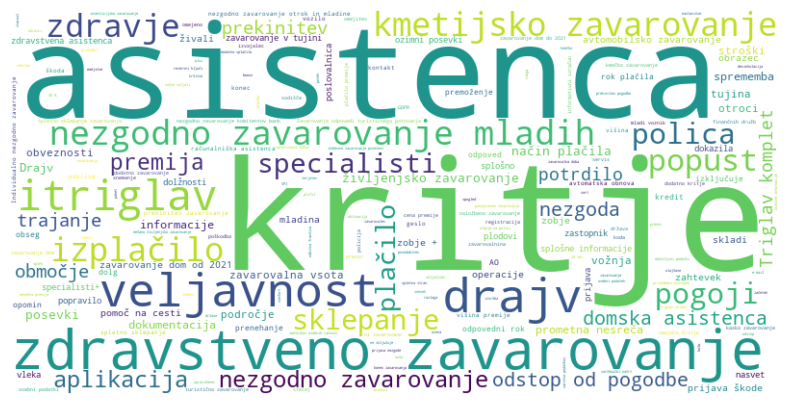

In [9]:
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keywords_counter)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

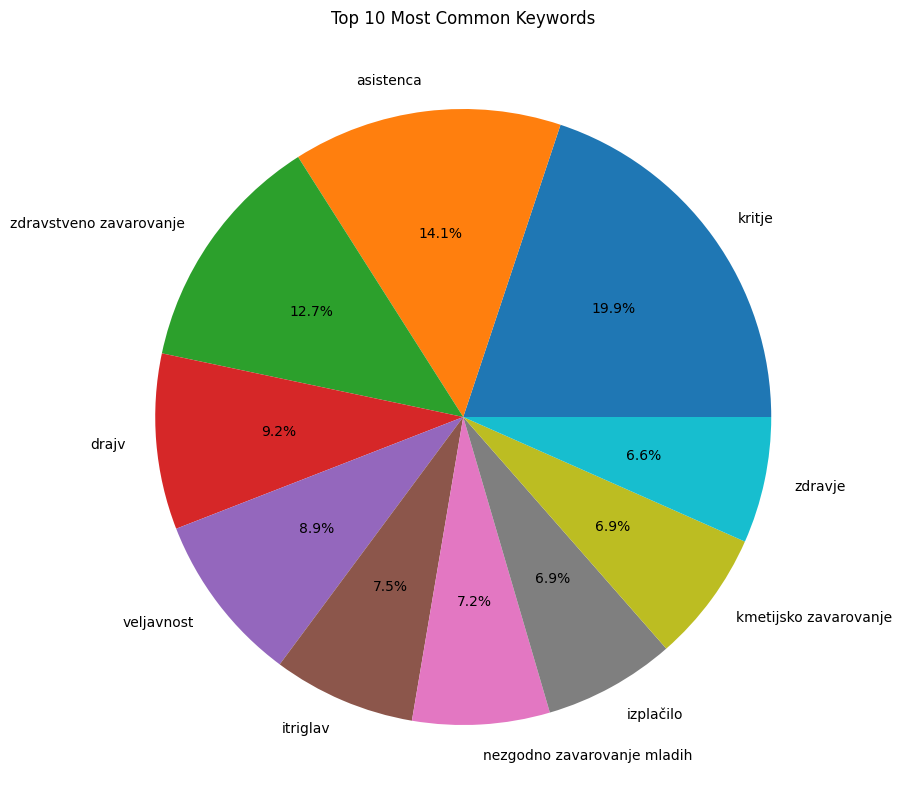

In [10]:
# Pie Chart Visualization for top 10 keywords

# Calculate the percentage of each count
counts_percentage = [count/sum(counts) for count in counts]

# Create a pie chart of the top 10 most common keywords
plt.figure(figsize=(10, 10))
plt.pie(counts_percentage, labels=keywords, autopct='%1.1f%%')
plt.title('Top 10 Most Common Keywords')
plt.show()


In [3]:
# Load the specified sheet into a pandas DataFrame
import pandas as pd
xls = pd.ExcelFile('Kategorije_delovna verzija_BS_20092021.xlsx')
df = pd.read_excel(xls, 'Baza znanja_07032022_Final+HTML')

# Display the first few rows of the DataFrame to understand its structure
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NIVO I,NIVO II,NIVO III,NIVO IIIa,NaN,ZA BAZO,NaN,NaN,NaN,NaN,DRUGI NIVO (DA/NE),NaN,EMAIL
1,ASISTENCA/INFO,VRSTA STORITVE - Področje asistence oz. inform...,VSEBINA VPRAŠANJA,NaN,STRANKINA VPRAŠANJA Kaj stranke vprašajo pri d...,EXTERNAL ODGOVOR (STRANKI),HTML EXTERNAL,INTERNAL NAVODILA ZAPOSLENI,HTML INTERNAL,KLJUČNE BESEDE,DRUGI NIVO (DA/NE),KDO,NASLOVI
2,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo imena/priimka?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"ime, priimek, osebni podatek, kontakt, zahteve...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
3,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo kontaktnega podatka?,Za spremembo kontaktnih podatkov je potrebno o...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"osebni podatek, kontakt, zahtevek, sprememba",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
4,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo telefonske številke?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"telefonska številka, telefon, osebni podatek, ...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN


In [4]:
# Load the sheet again, skipping the first two rows
df = pd.read_excel(xls, 'Baza znanja_07032022_Final+HTML', skiprows=2)

# Rename the columns for easier understanding
df.columns = [
    'NIVO_I', 'NIVO_II', 'NIVO_III', 'NIVO_IIIa', 
    'Strankina_vprasanja', 'External_odgovor', 'HTML_External', 
    'Internal_navodila', 'HTML_Internal', 'Kljucne_besede', 
    'Drugi_nivo', 'Kdo', 'Email'
]

# Display the first few rows of the DataFrame to verify the changes
df.head()

,NIVO_I,NIVO_II,NIVO_III,NIVO_IIIa,Strankina_vprasanja,External_odgovor,HTML_External,Internal_navodila,HTML_Internal,Kljucne_besede,Drugi_nivo,Kdo,Email
0,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo imena/priimka?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"ime, priimek, osebni podatek, kontakt, zahteve...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
1,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo kontaktnega podatka?,Za spremembo kontaktnih podatkov je potrebno o...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"osebni podatek, kontakt, zahtevek, sprememba",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
2,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo telefonske številke?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"telefonska številka, telefon, osebni podatek, ...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
3,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo e-maila/e-poštnega naslova?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"e-mail, e-pošta, e-naslov, kontakt, zahtevek, ...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
4,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo osebnih podatkov?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"naslov, pošta, sprememba, osebni podatki, zaht...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN


In [5]:
# Drop rows where 'NIVO_II' or 'Kljucne_besede' is NaN
df = df.dropna(subset=['NIVO_II', 'Kljucne_besede'])

# Initialize an empty dictionary to store the results
keywords_by_service = {}

# Loop over the DataFrame rows
for _, row in df.iterrows():
    # Split the 'Kljucne_besede' into individual keywords
    keywords = [keyword.strip() for keyword in row['Kljucne_besede'].split(',')]
    
    # If the service type is not in the dictionary yet, add it with its keywords
    if row['NIVO_II'] not in keywords_by_service:
        keywords_by_service[row['NIVO_II']] = set(keywords)
    else:
        # If the service type is already in the dictionary, add the new keywords to its set
        keywords_by_service[row['NIVO_II']].update(keywords)

# Convert the sets of keywords to lists for JSON serialization
for service in keywords_by_service:
    keywords_by_service[service] = list(keywords_by_service[service])

keywords_by_service

{'Sprememba kontaktnih podatkov': ['vloga',
  'sprememba',
  'plačilo',
  'položnica',
  'naslov',
  'e-račun',
  'zahtevek',
  'telefonska številka',
  'sprememba podatkov',
  'itriglav',
  'e-mail',
  'osebni podatek',
  'UPN obrazec',
  'ime',
  'e-pošta',
  'priimek',
  'e-naslov',
  'osebni podatki',
  'direktna obremenitev',
  'račun položnica',
  'pošta',
  'kontakt',
  'trajnik',
  'telefon'],
 'Pravni postopki': ['plačilo sodne takse',
  'premoženje',
  'stanje na polici',
  'likvidacija',
  'korupcija',
  'Uradni list',
  'pregled pogodb',
  'poravnava',
  'stečaj',
  'zavarovanja',
  'dolg',
  'preklic',
  'sprememba datuma naroka',
  'podatki za KPK',
  'geslo',
  'sodišče'],
 'Terjatve / plačila': ['',
  'investicijsko zavarovanje',
  'stroški',
  'zamudne obresti',
  'razlaga',
  'sklep status',
  'Triglav komplet',
  'IBAN',
  'križanje polic',
  'datum nakazila',
  'status',
  'polica',
  'rok plačila',
  'stanje obrokov',
  'plačilo',
  'popust',
  'stanje plačil',
  '

In [6]:
# Load the specified sheet into a DataFrame, with headers in the second row
import pandas as pd
xls = pd.ExcelFile('Kategorije_delovna verzija_BS_20092021.xlsx')
df = pd.read_excel(xls, 'Baza znanja_07032022_Final+HTML', header=1)

# Display the first few rows of the DataFrame
df.head()


,NIVO I,NIVO II,NIVO III,NIVO IIIa,Unnamed: 4,ZA BAZO,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,DRUGI NIVO (DA/NE),Unnamed: 11,EMAIL
0,ASISTENCA/INFO,VRSTA STORITVE - Področje asistence oz. inform...,VSEBINA VPRAŠANJA,NaN,STRANKINA VPRAŠANJA Kaj stranke vprašajo pri d...,EXTERNAL ODGOVOR (STRANKI),HTML EXTERNAL,INTERNAL NAVODILA ZAPOSLENI,HTML INTERNAL,KLJUČNE BESEDE,DRUGI NIVO (DA/NE),KDO,NASLOVI
1,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo imena/priimka?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"ime, priimek, osebni podatek, kontakt, zahteve...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
2,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo kontaktnega podatka?,Za spremembo kontaktnih podatkov je potrebno o...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"osebni podatek, kontakt, zahtevek, sprememba",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
3,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo telefonske številke?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"telefonska številka, telefon, osebni podatek, ...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
4,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo e-maila/e-poštnega naslova?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"e-mail, e-pošta, e-naslov, kontakt, zahtevek, ...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN


In [7]:
# Remove the first row which is a duplicate header
df = df.iloc[1:]

# Display the first few rows of the DataFrame
df.head()

,NIVO I,NIVO II,NIVO III,NIVO IIIa,Unnamed: 4,ZA BAZO,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,DRUGI NIVO (DA/NE),Unnamed: 11,EMAIL
1,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo imena/priimka?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"ime, priimek, osebni podatek, kontakt, zahteve...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
2,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo kontaktnega podatka?,Za spremembo kontaktnih podatkov je potrebno o...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"osebni podatek, kontakt, zahtevek, sprememba",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
3,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo telefonske številke?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"telefonska številka, telefon, osebni podatek, ...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
4,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo e-maila/e-poštnega naslova?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"e-mail, e-pošta, e-naslov, kontakt, zahtevek, ...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN
5,Informacije,Sprememba kontaktnih podatkov,Sprememba kontaktnih podatkov,NaN,Kako uredim spremembo osebnih podatkov?,Za spremembo osebnih podatkov je potrebno odda...,NaN,"Stranki pojasnimo, da lahko vlogo za spremembo...",NaN,"naslov, pošta, sprememba, osebni podatki, zaht...",Da,"Zaledna podpora, Podpora ŽZ, TZZ, Triglav Poko...",NaN


In [11]:
from collections import defaultdict

# Initialize the dictionary
keywords_dict = defaultdict(lambda: defaultdict(int))

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    level = row['NIVO II']
    keywords = str(row['Unnamed: 9']).split(',')
    
    # Count the frequency of each keyword
    for keyword in keywords:
        keyword = keyword.strip()  # Remove leading and trailing whitespace
        keywords_dict[level][keyword] += 1

# Convert the defaultdict back to a regular dict for serialization
keywords_dict = dict(keywords_dict)

keywords_dict

{'Sprememba kontaktnih podatkov': defaultdict(int,
             {'ime': 1,
              'priimek': 1,
              'osebni podatek': 3,
              'kontakt': 4,
              'zahtevek': 6,
              'sprememba': 8,
              'telefonska številka': 1,
              'telefon': 1,
              'e-mail': 1,
              'e-pošta': 1,
              'e-naslov': 1,
              'vloga': 2,
              'itriglav': 2,
              'naslov': 2,
              'pošta': 1,
              'osebni podatki': 1,
              'položnica': 1,
              'sprememba podatkov': 1,
              'plačilo': 2,
              'UPN obrazec': 1,
              'trajnik': 1,
              'direktna obremenitev': 1,
              'račun položnica': 1,
              'e-račun': 1}),
 'Pravni postopki': defaultdict(int,
             {'zavarovanja': 1,
              'stečaj': 5,
              'sodišče': 5,
              'dolg': 2,
              'premoženje': 3,
              'stanje na polici': 1,

In [26]:
import json

# Save the dictionary to a JSON file
file_path = "./keywords_all_for_level_counted.json"
with open(file_path, 'w', encoding='utf-8') as f:
    json.dump(keywords_dict, f, ensure_ascii=False)

file_path


'./keywords_all_for_level_counted.json'

In [12]:
# Initialize the dictionary
keywords_to_levels_dict = defaultdict(set)

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    level = row['NIVO II']
    keywords = str(row['Unnamed: 9']).split(',')
    
    # Add the level to the set of levels for each keyword
    for keyword in keywords:
        keyword = keyword.strip()  # Remove leading and trailing whitespace
        keywords_to_levels_dict[keyword].add(level)

# Keep only the keywords that appear in just one level
specific_keywords_dict = {level: {} for level in df['NIVO II'].unique()}
for keyword, levels in keywords_to_levels_dict.items():
    if len(levels) == 1:
        level = list(levels)[0]  # Get the only level in the set
        specific_keywords_dict[level][keyword] = keywords_dict[level][keyword]

# If a level does not contain specific keywords, set its value to "This level does not contain specific keywords"
for level, keywords in specific_keywords_dict.items():
    if not keywords:
        specific_keywords_dict[level] = "This level does not contain specific keywords"

specific_keywords_dict

{'Sprememba kontaktnih podatkov': {'ime': 1,
  'priimek': 1,
  'osebni podatek': 3,
  'telefonska številka': 1,
  'e-pošta': 1,
  'e-naslov': 1,
  'naslov': 2,
  'položnica': 1,
  'direktna obremenitev': 1,
  'račun položnica': 1},
 'Pravni postopki': {'stečaj': 5,
  'sodišče': 5,
  'likvidacija': 2,
  'poravnava': 2,
  'sprememba datuma naroka': 1,
  'plačilo sodne takse': 1,
  'pregled pogodb': 1,
  'korupcija': 1,
  'Uradni list': 1,
  'podatki za KPK': 1},
 'Terjatve / plačila': {'izvršba': 3,
  'sklep status': 1,
  'rubež': 1,
  'terjatev': 3,
  'zamudne obresti': 1,
  'blokiran račun': 1,
  'preplačilo': 2,
  'povračilo denarja': 1,
  'sklic': 1,
  'IBAN': 1,
  'dvojni odtegljaj': 1,
  'datum nakazila': 1,
  'datum prekinitve': 1,
  'osebno zavarovanje': 1,
  'križanje polic': 1,
  'obroki': 1,
  'zamik': 1,
  'stanje obrokov': 1,
  'stanje plačil': 1,
  'konto kartica': 1,
  'zapisi na računu': 1,
  'razlog prejetja': 1,
  'poravnan račun': 1,
  'razlaga': 3,
  'vplačilo': 1,
  

In [16]:
ct = 0
for level, keywords in specific_keywords_dict.items():
    if type(keywords) == dict:
        ct += len(keywords)
    else:
        ct += 1

print(ct)

902


In [13]:
import json

# Save the dictionary to a JSON file
file_path = "./keywords_unique_for_level_counted.json"
with open(file_path, 'w', encoding='utf-8') as f:
    json.dump(specific_keywords_dict, f, ensure_ascii=False)

file_path


'./keywords_unique_for_level_counted.json'

In [3]:
import pandas as pd
import os
import json
import tiktoken
import openai
import numpy as np
from langchain.chat_models import AzureChatOpenAI
from langchain.schema import HumanMessage

In [4]:
BASE_URL_4 = "https://danijel-test02.openai.azure.com/"
API_KEY_4 = "05fe89f89e984fd188cb6143d6f5699a"
DEPLOYMENT_NAME_4 = "gpt-4"
model_4 = AzureChatOpenAI(
    openai_api_base=BASE_URL_4,
    openai_api_version="2023-05-15",
    deployment_name=DEPLOYMENT_NAME_4,
    openai_api_key=API_KEY_4,
    openai_api_type="azure",
    temperature=0.0,
)

In [5]:
def gpt4_call(prompt):
    return model_4([HumanMessage(content=prompt)])

# Then you can use it like this:
# translation = gpt4_call("Pozdravljen svet!")

In [73]:
import json

# Load the JSON file
with open("./keywords_unique_for_level_counted.json", "r") as file:
    data = json.load(file)

most_frequent_keywords = []

# For each level, sort the keywords by count and take the top 3
for level, keywords in data.items():
    sorted_keywords = sorted(keywords.items(), key=lambda x: x[1], reverse=True)
    tmp = [x[0] for x in sorted_keywords[:3]]
    for keyword in tmp:
        most_frequent_keywords.append(keyword)
    #most_frequent_keywords.append([x[0] for x in sorted_keywords[:5]])


most_frequent_keywords


['osebni podatek',
 'naslov',
 'ime',
 'stečaj',
 'sodišče',
 'likvidacija',
 'izvršba',
 'terjatev',
 'razlaga',
 'devinkulacija',
 'vinkulacija',
 'izplačilo kredita',
 'zdravstveno zavarovanje',
 'veljavnost',
 'nezgodno zavarovanje mladih',
 'škodni dogodek',
 'cenilec',
 'Skplus servis',
 'naroči zastopnika',
 'obisk agenta',
 'zastopnika',
 'GDPR',
 'varstvo podatkov',
 'kršitve',
 'help desk',
 'okrožnica',
 'drajv koda',
 'banka',
 'naložba',
 'napaka v aplikaciji',
 'Planica',
 'motoristi',
 'predčasna prekinitev zavarovanja',
 'pohvala',
 'pritožba',
 'pritožbeni postopek',
 'storitev',
 'interaktivni obrazci',
 'prag aktiviranja',
 'letni agregat',
 'e-pero',
 'podpis',
 'napake na polici',
 'aktivacija',
 'digitalno potrdilo',
 'enkratna',
 'sprememba gesla',
 'novo geslo',
 'pozabljeno',
 'Triglav',
 'Zdravstvena zavarovalnica',
 'povračilo stroškov',
 'drajv',
 'Drajv',
 'vožnja',
 'policija',
 'SPI',
 'plus',
 'vodovod',
 'inštalater',
 'voda',
 'računalniška asistenca',

In [78]:

least_frequent_keywords = []

email = """Zadeva: Odpoved napovedanega obiska

Pozdravljeni!

Danes sem prejela vaš klic in najavo zav. zastopnika za jutri (18.4.) ob 19h na ime Anja Masten, Velike Žablje 60a, 5263 Dobravlje....
Ker je prišlo nekaj vmes in me ne bo doma, najavo odpovedujem. Ko bom zainteresirana, vas bom kontaktirala, zaenkrat me ne zanima.
Ker sem tudi klicala nazaj na vašo tel. številko in nisem dobila odgovora, vas prosim za povratno informacijo o odpovedi obiska.

Hvala in lep pozdrav!
Anja Masten"""

In [79]:
prompt = f"""Given the email and the list of keywords pick the most relevant keywords for the email. 
If you think that none of the keywords are relevant, genereate several new keywords matching the email content, but tell the user that none of the keywords are relevant.
------
Email: {email}
Keywords: {most_frequent_keywords}
------
OUTPUT:
"""

In [80]:
print(prompt)

Given the email and the list of keywords pick the most relevant keywords for the email. 
If you think that none of the keywords are relevant, genereate several new keywords matching the email content, but tell the user that none of the keywords are relevant.
------
Email: Zadeva: Odpoved napovedanega obiska

Pozdravljeni!

Danes sem prejela vaš klic in najavo zav. zastopnika za jutri (18.4.) ob 19h na ime Anja Masten, Velike Žablje 60a, 5263 Dobravlje....
Ker je prišlo nekaj vmes in me ne bo doma, najavo odpovedujem. Ko bom zainteresirana, vas bom kontaktirala, zaenkrat me ne zanima.
Ker sem tudi klicala nazaj na vašo tel. številko in nisem dobila odgovora, vas prosim za povratno informacijo o odpovedi obiska.

Hvala in lep pozdrav!
Anja Masten
Keywords: ['osebni podatek', 'naslov', 'ime', 'stečaj', 'sodišče', 'likvidacija', 'izvršba', 'terjatev', 'razlaga', 'devinkulacija', 'vinkulacija', 'izplačilo kredita', 'zdravstveno zavarovanje', 'veljavnost', 'nezgodno zavarovanje mladih', 'ško

In [81]:
print(gpt4_call(prompt).content)

None of the keywords are relevant. New relevant keywords: ['obisk zastopnika', 'odpoved obiska', 'telefonski klic', 'povratna informacija', 'Anja Masten', 'Dobravlje']


In [ ]:
AI_found_taxonomies =  f"""["Kako lahko prekličem dogovorjen termin s svetovalcem/zastopnikom?", "Blokiran račun, urejanje terjatev", "Do kdaj lahko sklenem zavarovanje odpovedi turističnega zavarovanja?","Investicijsko zavarovanje fleks za odrasle", "i.Triglav nivo zaupanja tier", "Informacije o opominu", "Kaj je digitalna poslovalnica i.triglav?", "Informacije o opominu"]"""

email_question_fact =  f"""Anja je dobila klic iz Triglava in se je zmenila za obisk agenta naslednji dan. Ko se je zjutraj zbudila, se ji ni več dalo imeti obiska od agenta"""

keywods = most_frequent_keywords

In [1]:
input_text = """Zadeva: Napaka v aplikaciji Drajv - Prošnja za pomoč

Spoštovani!

Upam, da ste dobro. Pišem vam glede težave, s katero se srečujem pri uporabi aplikacije Drajv.
Opazil sem, da mi aplikacija Drajv javlja napako , kar mi preprečuje nemoteno uporabo aplikacije. Kljub mojem poskusu, da bi rešil težavo sam, se žal nisem uspel izogniti napaki.
Zato se obračam na vas s prošnjo za pomoč. Bi mi lahko prosim svetovali, kako odpraviti to težavo ali korake, ki jih moram sprejeti, da ponovno pridobim dostop do funkcionalnosti aplikacije Drajv?

Prilagam tudi zaslonske posnetke napake za boljšo predstavo o težavi, s katero se srečujem.

Hvala vam za vaš čas in trud pri reševanju te težave. Veselim se vašega odziva in rešitve problema.
Lep pozdrav"""

In [6]:


keywods_prompt_oneShot = f"""Consider the following text. Generate keywors that are relevant for the text.
Text is derived from an email that was sent to Zavarovalnica Triglav (Slovenian insurance company) customer support.
------
EXAMPLE PROMPT:
text:
Zadeva: Preklic dogovorjenega termina
Spoštovani!
Žal mi je, a ne bom se mogel udeležiti dogovorjenega termina za svetovanje dne 12.3.2023 ob 14ih.
Hvala za razumevanje.
Lep pozdrav!
------
OUTPUT:
["obisk agenta", "zastopnika", "obisk svetovalca", "triglav svetovanje", "odpoved obiska"]
------
ACTUAL PROMPT:
text:
{input_text}
------
OUTPUT:
""" 
prompt_output = gpt4_call(keywods_prompt_oneShot).content

In [7]:
print(prompt_output)

["Napaka", "aplikacija Drajv", "pomoč", "težava", "odpravljanje napake", "zaslonski posnetek", "funkcionalnost", "podpora uporabnikom", "rešitev problema"]


GPT generated keywords

    ["Napaka", "aplikacija Drajv", "pomoč", "težava", "odpravljanje napake", "zaslonski posnetek", "funkcionalnost", "podpora uporabnikom", "rešitev problema"]

Keywords from KB for question of this type (Kaj lahko naredim v primeru, ko mi aplikacija javlja napako?)

    ["napaka v aplikaciji", "tehnična podpora", "tehnična težava"]